In [193]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd

# Linear Logistic Classifier

In [205]:
class LogisticRegression:
    def __init__(self, training_data, n_features, learn_rate=0.01, n_iter=100, tolerance=0.001):
        """
            learning_rate: float; step size of update;
            training_data: DataFrame; raw dataset with two independent variables;
            weights: array; output; coefficients
            x: array; first independent variable;
            y: array; second independent variable;
            label: correct provided label;
        """
        self.training_data = training_data
        self.weights = np.zeros(n_features + 1)
        # self.weights = np.zeros(n_features)
        # self.weights_0 = 0
        self.learn_rate = learn_rate
        self.n_iter = n_iter
        self.tolerance = tolerance

        self.label = training_data['label'].to_numpy()
    
    def prepare_x(self, index):
        x = [1]
        for column_name in self.training_data.columns:
            if column_name != "label":
                x.append(self.training_data[column_name].to_numpy()[index])
        return x
    
    # use sigmoid as the new classifier instead of a step function (0-1 loss)
    def sigmoid(self, input):
        output = 1/(1+math.e**(-input))
        return output

    # negative log likelihood = cross entropy
    def loss(guess, actual):
        loss = -(actual * np.log10(guess) + (1 - actual * np.log10(1-guess)))
        return loss

    # gradient of logistic regression with objective function
    def gradient_lr(self, lamb = 0):
        length = len(self.label)
        total = 0
        for index in range(length):
            x = self.prepare_x(index)
            guess = self.sigmoid(np.dot(np.transpose(self.weights), x))
            actual = self.label[index]
            total += np.multiply((guess - actual), x)
        gradient = total/length + lamb * self.weights
        return gradient
    
    # gradient descent process to get the local minimum
    def gd(self):
        for _ in range(self.n_iter):
            gradient = self.gradient_lr()
            self.weights -= self.learn_rate * gradient
            if np.linalg.norm(gradient) <= self.tolerance:
                break
        return self.weights

In [206]:
data = pd.read_csv("data.csv")
data.rename(columns={'3': 'label'}, inplace=True)
data = data.drop(columns=['0'])
data

,1,2,label
0,-0.383362,-0.487992,0
1,-2.360335,-2.440053,0
2,-0.358443,0.141981,0
3,0.991341,0.804249,0
4,-0.133086,-0.237400,0
...,...,...,...
1995,0.095230,3.332253,1
1996,-1.062603,2.929609,1
1997,1.550248,4.898206,1
1998,0.059165,4.654552,1


In [207]:
lr = LogisticRegression(training_data=data, n_features=2, learn_rate=10, n_iter=100, tolerance=0.001)
weights = lr.gd()

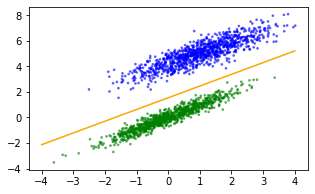

In [209]:
line_indpt = np.linspace(-4, 4, 100)
line = -weights[0]/weights[2] + ((-weights[1])/weights[2]) * line_indpt
color = np.where(data["label"]<1,'g', 'b')
plt.figure(figsize=(5,3))
plt.scatter(data["1"], data["2"], s=3, c=color, alpha=0.5)
plt.plot(line_indpt, line, color="orange")